In [1]:
import os
import gzip
import anndata
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dynamo as dyn
pd.set_option("display.max_columns", 20)
pd.set_option("display.max_rows", 20)
dyn.get_all_dependencies_version()

|-----> setting visualization default mode in dynamo. Your customized matplotlib settings might be overritten.


package,umap-learn,pynndescent,python-igraph,numdifftools,seaborn,statsmodels,numba,dynamo-release,scikit-learn,cvxopt,pandas,scipy,numpy,networkx,pre-commit,colorcet,loompy,openpyxl,get-version,matplotlib,tqdm,setuptools
version,0.5.3,0.5.7,0.9.11,0.9.40,0.12.0,0.13.2,0.55.0,1.1.0,1.1.2,1.3.0,1.5.0,1.9.1,1.21.0,2.8.6,2.20.0,3.0.0,3.0.7,3.0.10,3.5.4,3.6.0,4.64.1,65.3.0


In [3]:
dat = pd.read_csv("seurat_outputs/meta.data.csv", index_col=0)
dat = dat[(dat["s4U"] == 50) & (dat["Time"] == 3) & (np.isnan(dat["ActD"])) & (dat["TCRatio"] >= 0.008)]
dat.index = dat["Cell"]
print(Counter(dat["Phase"]))
dat

Counter({'G1': 44, 'G2M': 14, 'S': 8})


,orig.ident,nCount_RNA,nFeature_RNA,Run,Cell,s4U,Time,ActD,Barcode,UMI,Strain,Cells,Group,LibStruct,Platform,Species,Remark,Paternal,CellReads,TrimReads,TrimRatio,MappedReads,MappedRatio,MitoRatio,FilteredReads,FilteredRatio,FilteredClipReads,FilteredClipRatio,DuplucateReads,DuplicateRatio,UniqueReads,Specificity,AssemblyGenes,TCRatio,CTRatio,MismatchSNR,TotalUMIs,NascentUMIs,NascentRatio,TotalGenes,NascentGenes,S.Score,G2M.Score,Phase,old.ident,RNA_snn_res.0.5,seurat_clusters
Cell,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20220719_K562R4.C02,X20220719,6162,2277,20220719_K562R4,20220719_K562R4.C02,50,3.0,NaN,11,20,K562,1,NaN,struct2,R10,Human,K562_50UM_3h_sc2_3,NaN,536092,363541,0.678132,362441,0.996974,0.055554,311756,0.860157,271413,0.870594,260412,0.959468,11001,0.999918,2371,0.015326,0.002420,6.331762,6483,1022,0.157643,2298,713,-0.202242,-0.029337,G1,X20220719,2,2
20220719_K562R4.C03,X20220719,7025,2356,20220719_K562R4,20220719_K562R4.C03,50,3.0,NaN,12,20,K562,1,NaN,struct2,R10,Human,K562_50UM_3h_sc2_4,NaN,543160,381976,0.703248,381198,0.997963,0.083941,317975,0.834147,277379,0.872330,265136,0.955862,12243,0.999939,2461,0.010035,0.002332,4.303867,7293,801,0.109831,2374,586,-0.201902,-0.007111,G1,X20220719,2,2
20220719_K562R4.C19,X20220719,7093,2561,20220719_K562R4,20220719_K562R4.C19,50,3.0,NaN,49,20,K562,1,NaN,struct2,R10,Human,K562_50UM_3h_sc7_1,NaN,279196,181555,0.650278,180089,0.991925,0.108003,150900,0.837919,128323,0.850384,115357,0.898958,12966,0.999988,2816,0.008678,0.002638,3.289680,7397,558,0.075436,2587,444,-0.123758,-0.019830,G1,X20220719,2,2
20220719_K562R4.C20,X20220719,12434,3255,20220719_K562R4,20220719_K562R4.C20,50,3.0,NaN,51,20,K562,1,NaN,struct2,R10,Human,K562_50UM_3h_sc7_3,NaN,337877,239148,0.707796,237999,0.995195,0.081373,210778,0.885626,182477,0.865731,160148,0.877634,22329,1.000000,3557,0.009285,0.002439,3.806585,12811,1383,0.107954,3285,937,-0.001447,-0.056406,G1,X20220719,2,2
20220719_K562R4.C21,X20220719,13116,3685,20220719_K562R4,20220719_K562R4.C21,50,3.0,NaN,52,20,K562,1,NaN,struct2,R10,Human,K562_50UM_3h_sc7_4,NaN,414718,290282,0.699950,289378,0.996886,0.076743,254420,0.879196,218911,0.860432,195471,0.892925,23440,1.000000,3949,0.014525,0.002499,5.812239,13766,2649,0.192431,3732,1614,-0.293139,-0.226693,G1,X20220719,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20220729_K562R2.C79,X20220729,5144,2143,20220729_K562R2,20220729_K562R2.C79,50,3.0,NaN,96,20,K562,1,NaN,struct2,R10,Human,K562_50UM_3h_sc12_8,NaN,186285,147159,0.789967,147074,0.999422,0.176157,115156,0.782980,99175,0.861223,90019,0.907678,9156,0.999614,2366,0.013173,0.002151,6.123072,5457,1136,0.208173,2179,772,-0.258621,-0.142580,G1,X20220729,3,3
20221014_K562R1.C28,X20221014,5575,2394,20221014_K562R1,20221014_K562R1.C28,50,3.0,NaN,36,20,K562,1,NaN,struct2,R10,Human,K562_50UM_3h_sc5_4,NaN,915241,665900,0.727568,664338,0.997654,0.136467,522651,0.786725,464883,0.889471,454446,0.977549,10437,0.999995,2523,0.023908,0.002125,11.249865,6077,1601,0.263452,2414,972,-0.141163,-0.179680,G1,X20221014,2,2
20221014_K562R1.C38,X20221014,4710,2096,20221014_K562R1,20221014_K562R1.C38,50,3.0,NaN,54,20,K562,1,NaN,struct2,R10,Human,K562_50UM_3h_sc7_6,NaN,488629,355974,0.728516,352130,0.989201,0.115230,294678,0.836844,257974,0.875444,249767,0.968187,8207,1.000000,2218,0.020003,0.002306,8.673234,4976,1143,0.229703,2126,819,-0.113495,-0.038169,G1,X20221014,2,2


In [4]:
anno_t = pd.read_csv("/home/chenzonggui/species/homo_sapiens/GRCh38.p13/gencode.v39.annotation.tsv", sep="\t", index_col=0)
gid2gname = {gid: gname for gid, gname in anno_t[["GeneID", "GeneName"]].values}

strains = []
array1 = []
array2 = []
cells = []
for run, cell, strain in dat[["Run", "Cell", "Phase"]].values:
    path = "../../1_NanoNASCseq/results/expression/quantify/2TC/%s/%s/quant_gene.tsv.gz" % (run, cell)
    if not os.path.exists(path):
        continue
    d = pd.read_csv(gzip.open(path, "rt"), sep="\t", index_col=0)
    d.index = [gid2gname.get(x, x) for x in d.index]
    d = d[~d.index.duplicated()]
    d.index.name = "GeneName"
    s1 = d["Total"]
    s1.name = cell
    s2 = d["Nascent"]
    s2.name = cell
    array1.append(s1)
    array2.append(s2)
    strains.append(strain)
    cells.append(cell)

In [5]:
d1 = pd.DataFrame(array1).fillna(0)
d2 = pd.DataFrame(array2).fillna(0)
d1 = pd.DataFrame(d1, dtype=np.int)
d2 = pd.DataFrame(d2, dtype=np.int)

In [18]:
adata = anndata.AnnData(d1)
adata.obs["group"] = strains
adata.layers["total"] = d1
adata.layers["new"] = d2
adata.obs['time'] = 3
adata.obs = adata.obs.merge(dat, left_index=True, right_index=True)
dyn.pp.recipe_monocle(adata, tkey="time")
adata = adata[adata.obs["TotalUMIs"] > 2000,]
adata = adata[adata.obs["TCRatio"] > 0.008,]

|-----> recipe_monocle_keep_filtered_cells_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_cells_key=True
|-----> recipe_monocle_keep_filtered_genes_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_genes_key=True
|-----> recipe_monocle_keep_raw_layers_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_raw_layers_key=True
|-----> apply Monocole recipe to adata...
|-----> <insert> pp to uns in AnnData Object.
|-----------> <insert> has_splicing to uns['pp'] in AnnData Object.
|-----------> <insert> has_labling to uns['pp'] in AnnData Object.
|-----------> <insert> splicing_labeling to uns['pp'] in AnnData Object.
|-----------> <insert> has_protein to uns['pp'] in AnnData Object.
|-----> ensure all cell and variable names unique.
|-----> ensure all data in different layers in csr sparse matrix format.
|-----> ensure all labeling data properly collapased
|-----> 
Dynamo detects your labelin

In [19]:
dyn.tl.dynamics(adata, model='stochastic', cores=3, NTR_vel=True)
dyn.tl.reduceDimension(adata)
dyn.tl.leiden(adata)
dyn.tl.hdbscan(adata)
dyn.tl.louvain(adata)
dyn.tl.cell_velocities(adata, calc_rnd_vel=True)
dyn.vf.VectorField(adata, basis='umap')

|-----> dynamics_del_2nd_moments_key is None. Using default value from DynamoAdataConfig: dynamics_del_2nd_moments_key=False
|-----------> removing existing M layers:[]...
|-----------> making adata smooth...
|-----> calculating first/second moments...
|-----> [moments calculation] in progress: 100.0000%
|-----> [moments calculation] finished [1.4684s]
|-----> retrive data for non-linear dimension reduction...
|-----> perform umap...
|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [2.8921s]
|-----> accessing adj_matrix_key=distances built from args for clustering...
|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:pca
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected
|-----> <insert> connectivities to obsp in AnnData Object.
|-----> <insert> distances to obsp in AnnData Obje

|-----------> plotting with basis key=X_umap
|-----------> skip filtering group by stack threshold when stacking color because it is not a numeric type


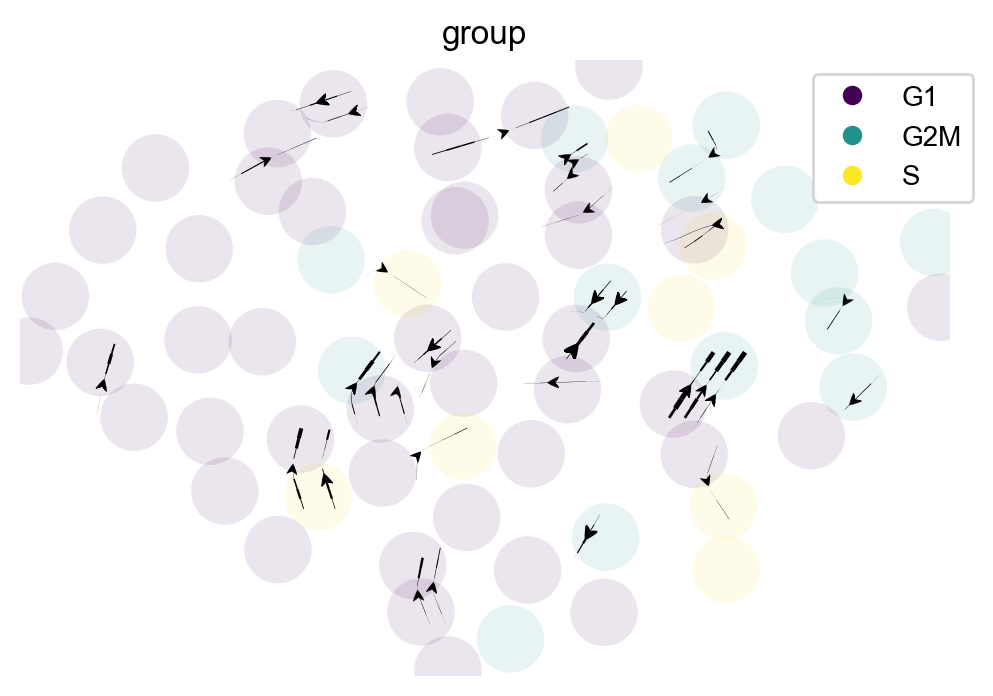

|-----------> plotting with basis key=X_umap
|-----------> skip filtering cell_cycle_phase by stack threshold when stacking color because it is not a numeric type


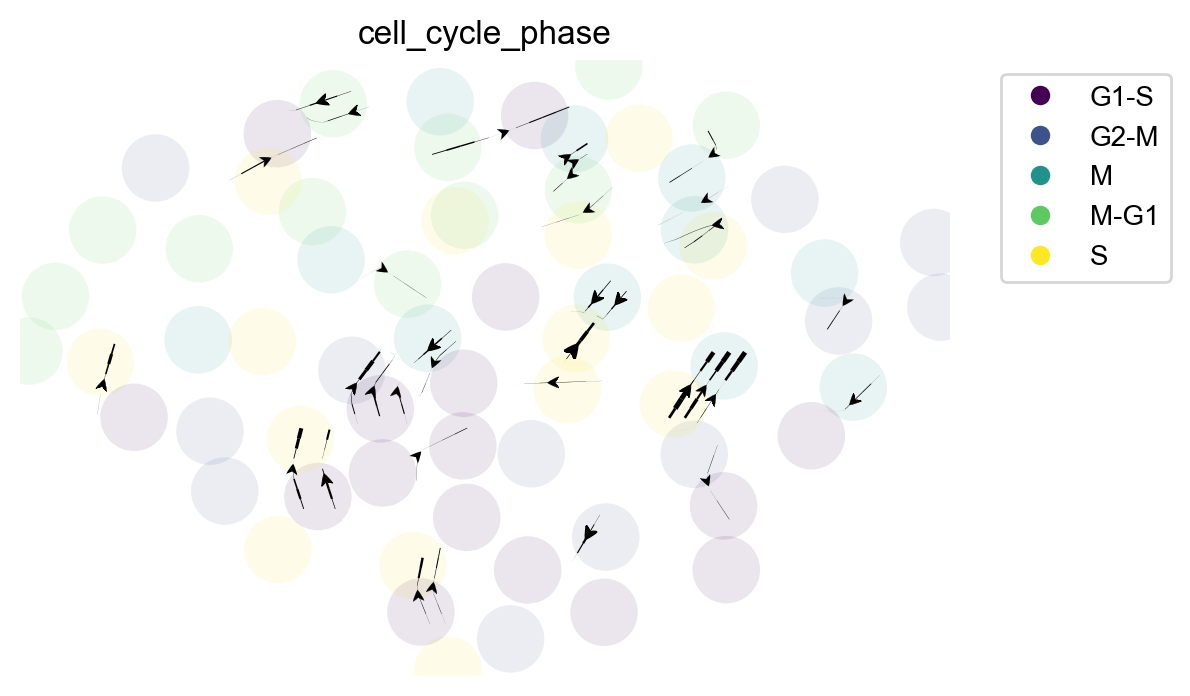

In [20]:
colors = ["group", "leiden", "nCounts", "nGenes", "louvain", "hdbscan"]
for color in ['group', 'cell_cycle_phase']:
    plt.figure(figsize=(6, 4))
    color_key_cmap = "viridis"
    # color_key_cmap = "Set1"
    dyn.pl.streamline_plot(adata, 
                           color=color, 
                           pointsize=0.3,
                           color_key_cmap = color_key_cmap, 
                           basis='umap', ax=plt.gca(), show_legend='right', 
                           save_show_or_return='return')
    # plt.tight_layout()
    plt.show()
    #plt.savefig("rna_velocity.v4.png", dpi=300)
    plt.close()
    # break

In [21]:
Counter(adata.obs["cell_cycle_phase"])

Counter({'M-G1': 12, 'G2-M': 12, 'G1-S': 16, 'S': 15, 'M': 11})

In [22]:
Counter(adata.obs["Phase"])

Counter({'G1': 44, 'G2M': 14, 'S': 8})

|-----------> plotting with basis key=X_umap
|-----------> skip filtering Phase by stack threshold when stacking color because it is not a numeric type
|-----------> plotting with basis key=X_umap_rnd
|-----------> skip filtering Phase by stack threshold when stacking color because it is not a numeric type


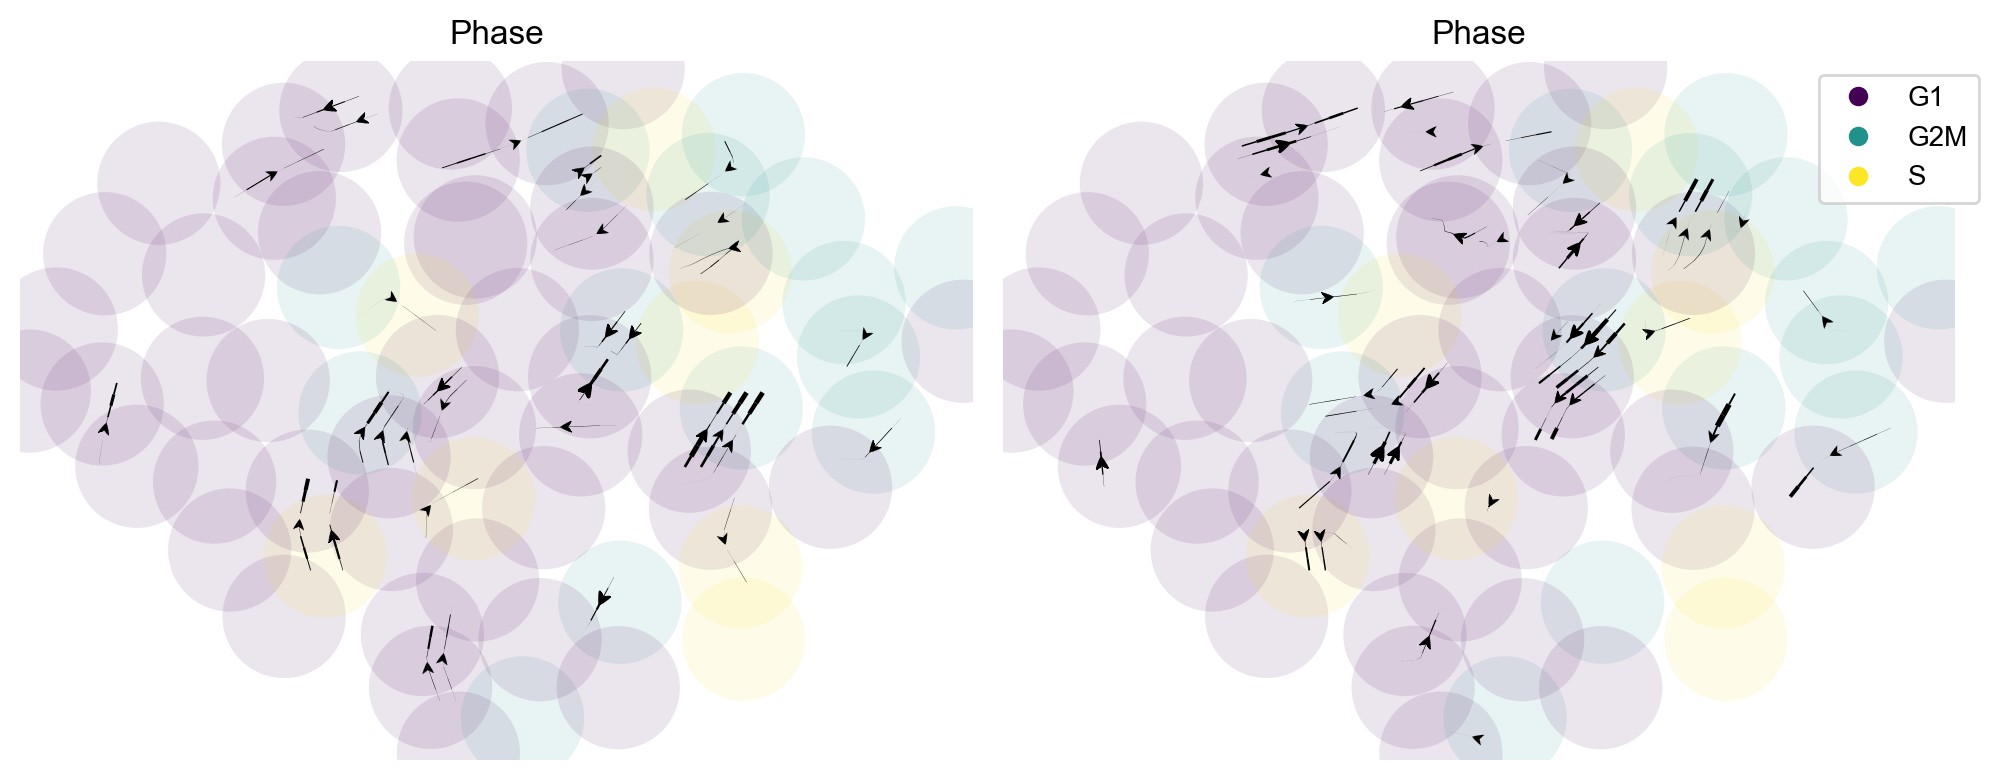

In [23]:
color = "Phase"
color_key_cmap = "viridis"

fig, axs = plt.subplots(1, 2, figsize=(11, 4))

axs[0] = dyn.pl.streamline_plot(adata, color=color, color_key_cmap = color_key_cmap, 
                       # pointsize=0.3,
                       basis='umap', ax=axs[0], show_legend=False, save_show_or_return='return')

axs[1] = dyn.pl.streamline_plot(adata, color=color, color_key_cmap = color_key_cmap, 
                       # pointsize=0.3,
                       basis='umap_rnd', ax=axs[1], show_legend='right', save_show_or_return='return')

plt.tight_layout()
plt.show()
#plt.savefig("figures/rna_velocity.png", dpi=300)